# Machine Learning Project - Rainfall prediction

# Data Exploration

## 1. Data Loading and Data Visualization

First we load some useful libraries for data loading and data visualization in Python

In [1]:
import pandas as pd
import numpy as np
import itertools
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import time


In [2]:
# Data loading
path = ""
rain = pd.read_csv(path + "rain_project.txt", sep = " ", )
# Let's take a look at the data
rain.head()

Id        date        ff           t          td         hu  \
1  22092001_527  2017-06-11  3.945000  289.408750  285.277083  78.783333   
2   22092001_65  2016-03-06  3.739583  276.375833  273.422500  81.700000   
3  22092001_210  2016-07-29  3.273750  288.869167  286.723333  87.620833   
4  22092001_136  2016-05-16  1.745000  284.288750  280.215833  76.587500   
5   22092001_33  2016-02-03  5.718750  277.527917  274.529167  81.391667   

           dd  precip  ws_arome  p3031_arome  u10_arome  v10_arome  \
1  246.750000     0.0  3.663785   244.299500   3.038503   1.416360   
2  260.333333     1.2  3.328476   305.660752   2.463886  -1.898971   
3  259.041667     0.2  3.232380   256.042392   2.963872   0.985627   
4  216.541667     0.0  1.720926   139.297271  -0.260693  -1.397603   
5  285.541667     1.6  4.424012   285.578800   3.940056  -1.457606   

    t2m_arome   d2m_arome    r_arome   tp_arome   msl_arome  rain rain_class  
1  289.232315  285.170885  79.037785   2.328277  101672.850   0.2   low_rain  
2  275.808688  273.672591  86.331598  10.675441  100583.760   4.2  high_rain  
3  289.627425  286.485126  82.301031   4.582309  101482.984   0.0    no_rain  
4  284.726139  280.367340  75.384116   0.940254  102223.586   0.0    no_rain  
5  277.751699  274.590656  80.435085  13.903076  102416.220   0.0    no_rain

**Remark**:

In this database, we realise that the qualitative variables including "Id", "date", "rain_class". 

The other variables are considered quantitative including "ff","t", "td", "hu", "dd", "precip", "ws_arome", "p3031_arome", "u10_arome", "v10_arome", "t2m_arome", "d2m_arome", "r_arome", "tp_arome", "msl_arome", "rain"

In [3]:
#Replace the column "date" into "month" to obtain the new data
from datetime import datetime, timedelta

rain["date"] = pd.to_datetime(rain["date"]).dt.month
rain = rain.rename(columns= {"date":"month"})

In [4]:
rain["rain_class"] = pd.Categorical(rain["rain_class"],ordered = False)
rain["month"] = pd.Categorical(rain["month"],ordered = False)
rain.dtypes

Id               object
month          category
ff              float64
t               float64
td              float64
hu              float64
dd              float64
precip          float64
ws_arome        float64
p3031_arome     float64
u10_arome       float64
v10_arome       float64
t2m_arome       float64
d2m_arome       float64
r_arome         float64
tp_arome        float64
msl_arome       float64
rain            float64
rain_class     category
dtype: object

We will store the name of variables in `var_names` variables and quantitative variables, qualitatives variables as `num_var` and `qual_var` respectively

In [5]:
names = list(rain.columns)
num_var = names[2:-1]
qual_var = [names[i] for i in [0,1,-1]]

### Unidimensional descriptive

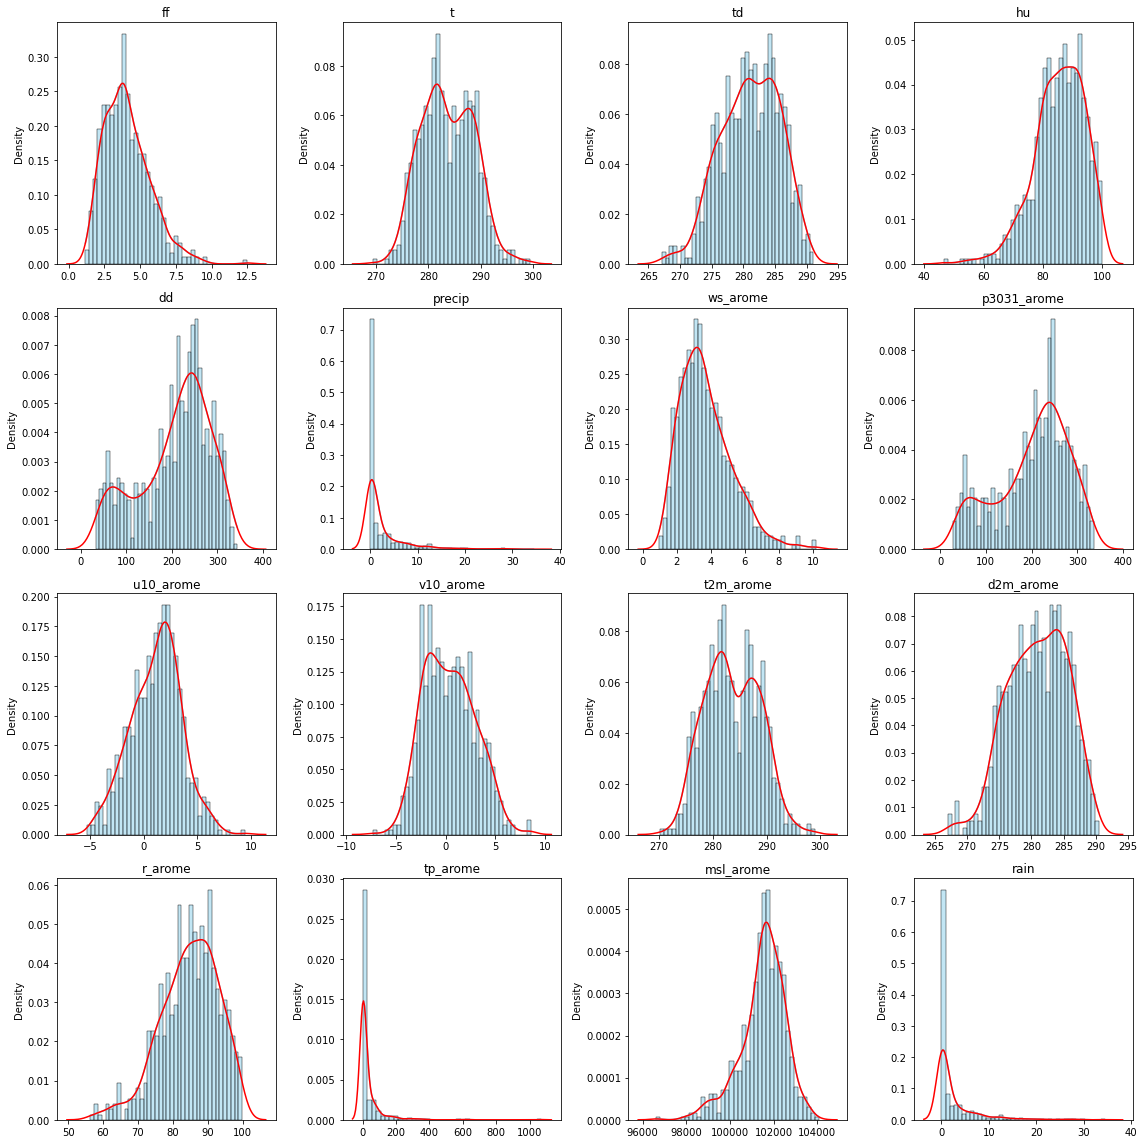

In [6]:
hist_fig, axs = plt.subplots(4,4,figsize=(16,16))
axs = axs.ravel()
for i in range(16):
    sns.histplot(data=rain[num_var[i]], stat='density', bins=40, kde=True, color="skyblue", ax=axs[i])
    sns.kdeplot(rain[num_var[i]], color='red', ax=axs[i])
    axs[i].set_xlabel("")
    axs[i].set_title(num_var[i])
plt.tight_layout()

The distributions of variables "precip" and "tp_arome" are not Gaussian, so we try to transform them by using the function log 

In [7]:
from math import log
rain["precip_log"] = rain["precip"].map(lambda x: log(1+log(1+x)))
rain["tp_arome_log"] = rain["tp_arome"].map(lambda x: log(1+x))
del rain["precip"]
del rain["tp_arome"]

In [8]:
rain_hist = pd.DataFrame.copy(rain)
del rain_hist["rain_class"]
del rain_hist["month"]
rain_hist.columns
var_quanti = rain_hist.columns[1:]

In [9]:

len(var_quanti)

16

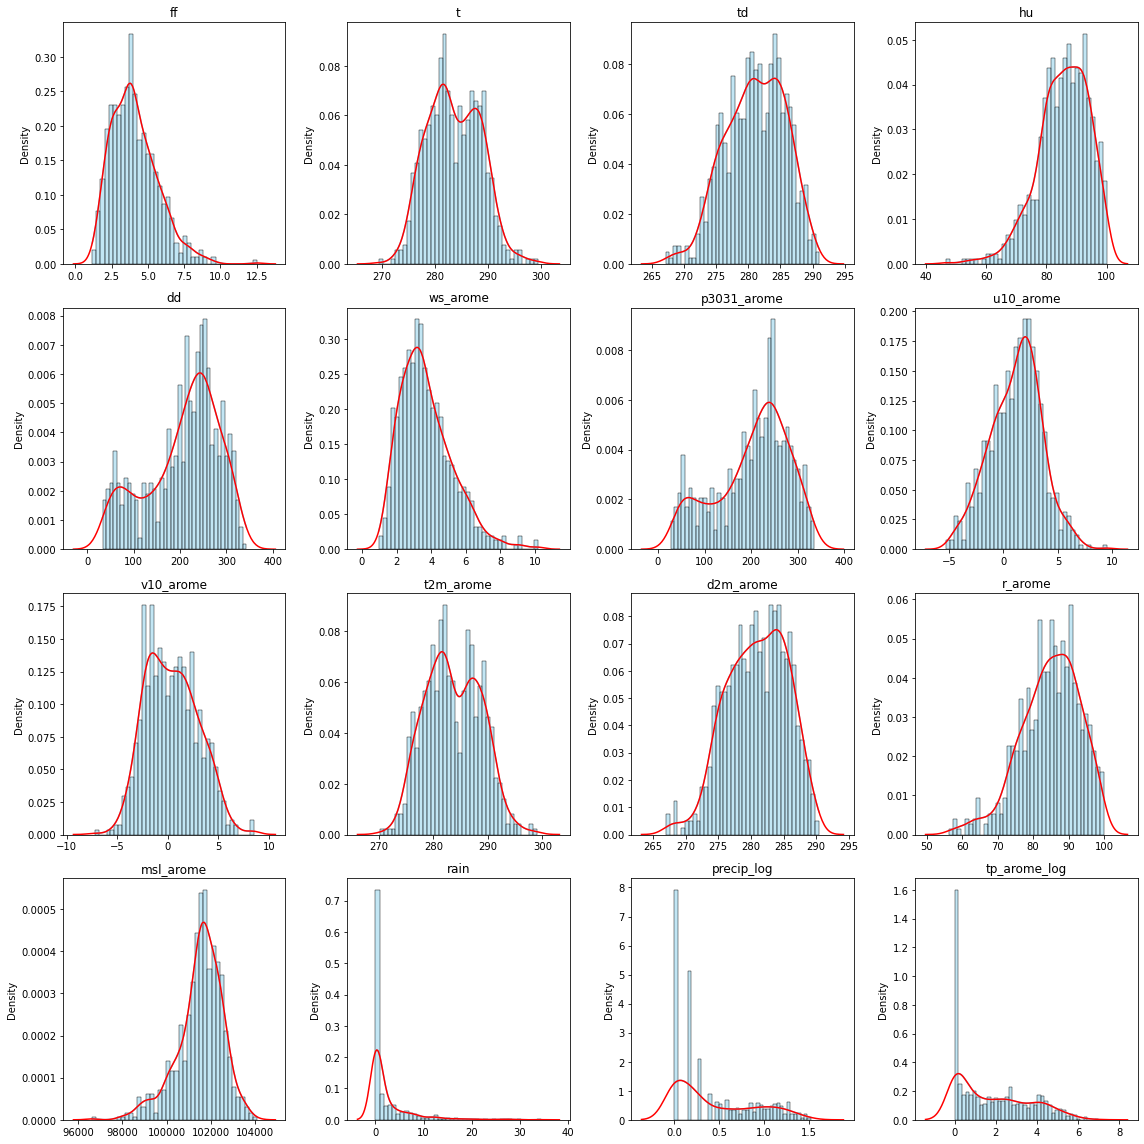

In [10]:
hist_fig, axs = plt.subplots(4,4,figsize=(16,16))
axs = axs.ravel()
for i in range(len(var_quanti)):
    sns.histplot(data=rain[var_quanti[i]], stat='density', bins=40, kde=True, color="skyblue", ax=axs[i])
    sns.kdeplot(rain[var_quanti[i]], color='red', ax=axs[i])
    axs[i].set_xlabel("")
    axs[i].set_title(var_quanti[i])
plt.tight_layout()

In [11]:
# We normalize tha data to obtain the scaled data
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
rain_scaled = rain
rain_scaled[var_quanti] = ss.fit_transform(rain_scaled[var_quanti])

### Mutidimensional exploration

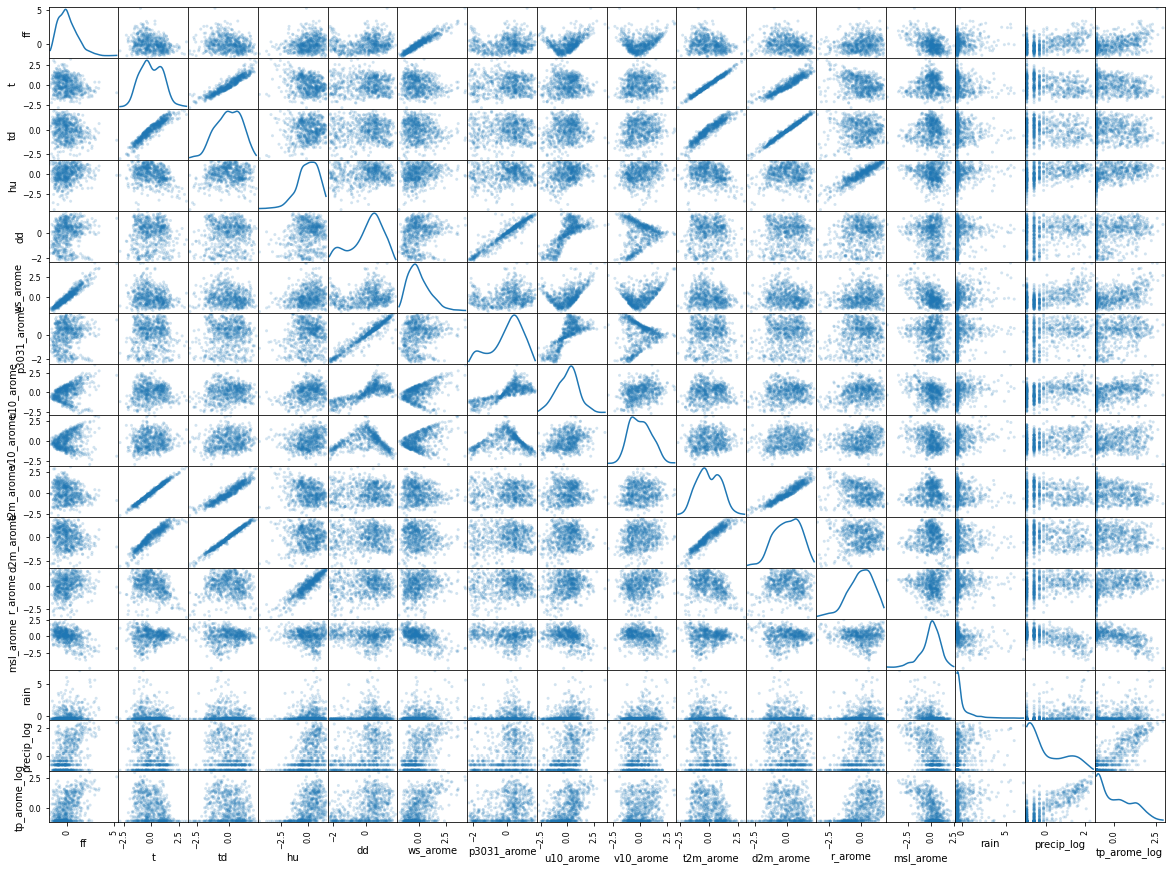

In [12]:
from pandas.plotting import scatter_matrix
scatter_matrix(rain_scaled[var_quanti], alpha = 0.2, figsize= (20,15), diagonal= 'kde')
plt.show()

In [13]:
corr_matrix = rain_scaled[var_quanti].corr()
corr_matrix.style.background_gradient(cmap='coolwarm')

> Commentaire: il y a une forte corrélation entre...

No handles with labels found to put in legend.


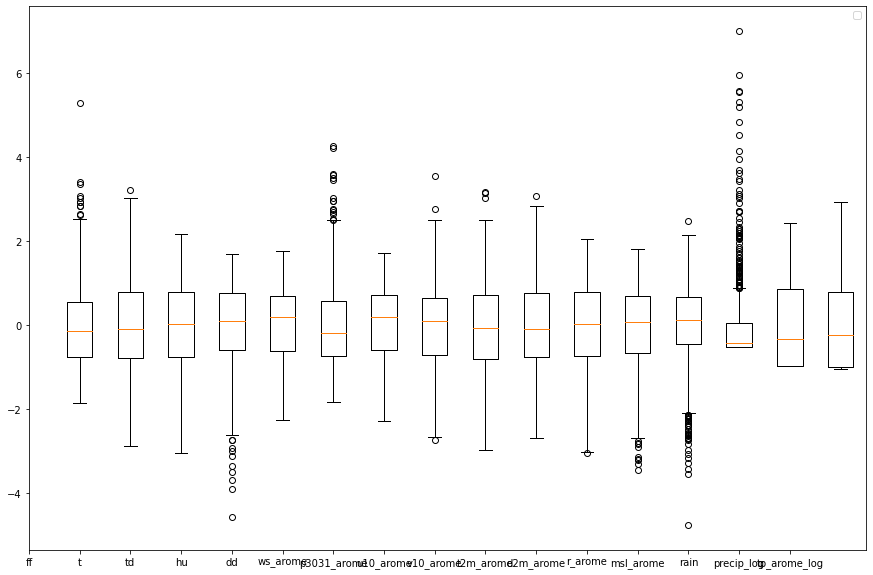

In [14]:
plt.figure(figsize = (15,10))
plt.boxplot(rain_scaled[var_quanti])
plt.xticks(np.arange(16),var_quanti)
plt.legend()

plt.show()

## 2. Principal component analysis

In [15]:
rain_acp = pd.DataFrame.copy(rain)
del rain_acp["rain"]
del rain_acp["rain_class"]
del rain_acp["month"]
del rain_acp["Id"]
var_acp = rain_acp.columns

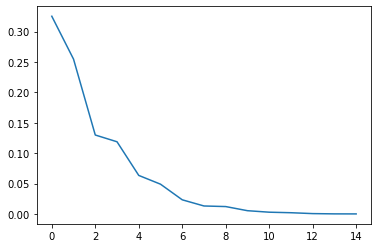

In [16]:
from sklearn.decomposition import PCA
pca = PCA()
## Estimation, calcul des composantes principales
C = pca.fit(rain_scaled[var_acp]).transform(rain_scaled[var_acp])
## Décroissance de la variance expliquée
plt.plot(pca.explained_variance_ratio_)
plt.show()

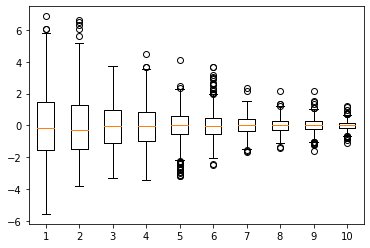

In [17]:
## distribution des composantes principales
plt.boxplot(C[:,0:10])
plt.show()

We decide to keep the first 4 components of PCA

In [18]:
rain_scaled.head()

Id month        ff         t        td        hu        dd  \
1  22092001_527     6 -0.086276  1.165624  0.911198 -0.798815  0.520432   
2   22092001_65     3 -0.215452 -1.472600 -1.662542 -0.455049  0.696394   
3  22092001_210     7 -0.508392  1.056397  1.225192  0.242796  0.679661   
4  22092001_136     5 -1.469748  0.129194 -0.187647 -1.057622  0.129106   
5   22092001_33     2  1.029149 -1.239386 -1.422274 -0.491390  1.022949   

   ws_arome  p3031_arome  u10_arome  v10_arome  t2m_arome  d2m_arome  \
1 -0.036622     0.530171   0.802536   0.401050   1.119517   0.921523   
2 -0.257852     1.324106   0.557303  -0.889355  -1.553856  -1.583566   
3 -0.321254     0.682109   0.770685   0.233398   1.198205   1.207852   
4 -1.318482    -0.828422  -0.605484  -0.694211   0.222093  -0.125007   
5  0.464961     1.064271   1.187298  -0.717566  -1.166897  -1.383551   

    r_arome  msl_arome      rain rain_class  precip_log  tp_arome_log  
1 -0.699507   0.153412 -0.473859   low_rain   -0.969076     -0.362398  
2  0.181588  -0.906150  0.398947  high_rain    0.331769      0.353770  
3 -0.305306  -0.031306 -0.517499    no_rain   -0.594321     -0.067294  
4 -1.140871   0.689217 -0.517499    no_rain   -0.969076     -0.670334  
5 -0.530713   0.876628 -0.517499    no_rain    0.531584      0.493051

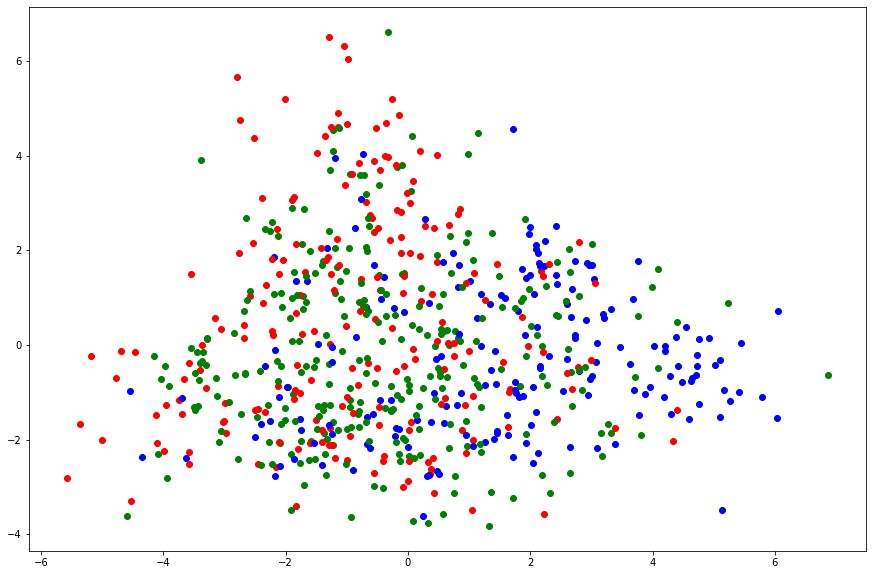

In [19]:
## Repésentation des individus on the first and second axes.
plt.figure(figsize=(15,10))
for i, j, q in zip(C[:,0], C[:,1], rain["rain_class"]):
    if q == "no_rain":
        color = "red"  
    elif q == "low_rain":
        color = "green"
    else: color = "blue"
    plt.plot(i, j, "o",color=color)
#plt.axis((-6,8,-5,7))  
plt.show()

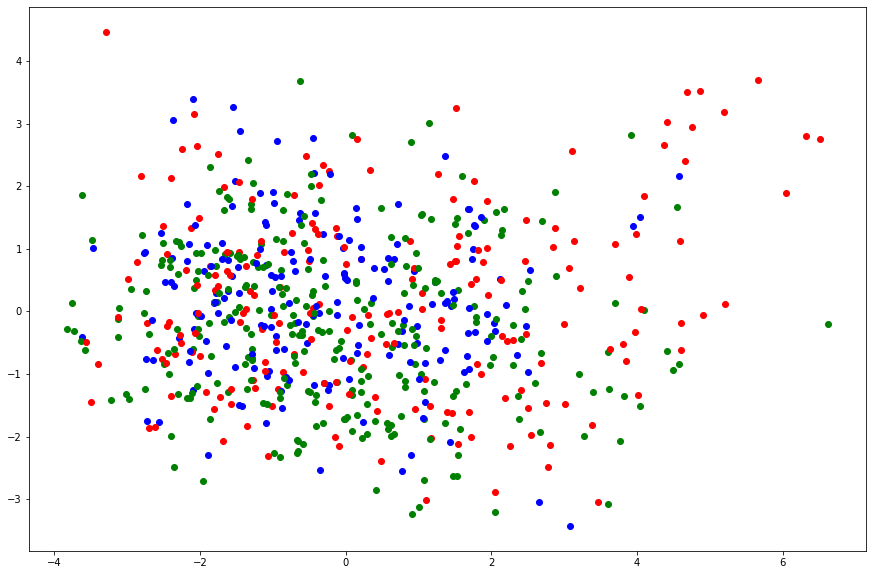

In [20]:
## Repésentation des individus
plt.figure(figsize=(15,10))
for i, j, q in zip(C[:,1], C[:,3], rain["rain_class"]):
    if q == "no_rain":
        color = "red"  
    elif q == "low_rain":
        color = "green"
    else: color = "blue"
    plt.plot(i, j, "o",color=color)
#plt.axis((-6,8,-5,7))  
plt.show()

With PCA, we realise that the data will be difficult to classify with a linear method(PCA is linear). We can hope that with an SVM or a RAndom Forest classes will be more distingueshed

In [21]:
pca.components_

array([[ 0.31103333, -0.26577693, -0.18616019,  0.24289979,  0.21274478,
         0.3212333 ,  0.20768672,  0.27444264,  0.12292168, -0.2517743 ,
        -0.181247  ,  0.23407263, -0.25190052,  0.33858974,  0.35752464],
       [-0.05381492, -0.40591897, -0.44891039, -0.07279125, -0.21748604,
        -0.09665032, -0.21340611, -0.26670734, -0.16014075, -0.41517227,
        -0.45104575, -0.04001108,  0.14257119, -0.12168654, -0.11835459],
       [ 0.23717632,  0.06916588,  0.10467099,  0.104572  , -0.52729566,
         0.24894998, -0.54008195, -0.30905387,  0.24305387,  0.08076474,
         0.10410277,  0.06479473, -0.26432729,  0.16378474,  0.11191205],
       [ 0.30824024,  0.06984252, -0.13088548, -0.57554936,  0.062797  ,
         0.31165101,  0.05484936,  0.09024837,  0.02700898,  0.07411771,
        -0.12323373, -0.59783661, -0.23299042, -0.03320331, -0.07275839],
       [-0.23362278,  0.0385557 ,  0.00572509, -0.09677036, -0.02586466,
        -0.25569339, -0.02353903, -0.14924732, 

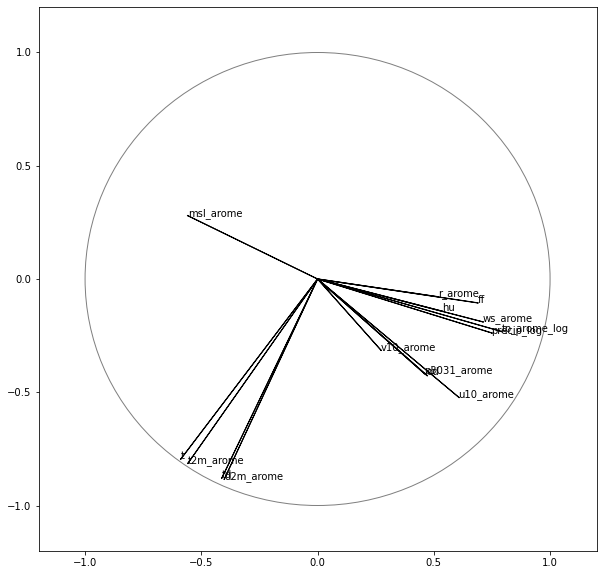

In [22]:
## coordonnées et représentation des variables
coord1=pca.components_[0]*np.sqrt(pca.explained_variance_[0])
coord2=pca.components_[1]*np.sqrt(pca.explained_variance_[1])
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(1, 1, 1)
for i, j, nom in zip(coord1,coord2,var_acp):
    plt.text(i, j, nom)
    plt.arrow(0,0,i,j,color='black')
plt.axis((-1.2,1.2,-1.2,1.2))
#plt.grid(True)
# cercle
c=plt.Circle((0,0), radius=1, color='gray', fill=False)
ax.add_patch(c)
plt.show()

Les variables les plus corélées avec la \bold{première} composante sont : 
    r_arome, hu, ff, ws_arome, tp_arome_log, precip_log (positif)
    msl_arome(négatif)
   
Les variables corélées  moyennement avec la \bold{première} composante sont : 
   v10_arome, p303_arome, u10_arome
   
Les variables les plus corélées avec la \bold{deuxième} composante sont : 
    t2m_arome, d2m_arome, t, dd

## Modelisations


### Extraction des échantillons apprentissage et test

Transformation des données pour l'apprentissage:

Les variables qualitatives sont transformées en paquets d'indicatrices ou *dummy variables*

Le type data frame est transformé en une matrice. 

In [23]:
# Variables explicatives
rainDum=pd.get_dummies(rain[["month"]])
del rainDum['month_1']
rainQuanti = rain[var_quanti]
dfC=pd.concat([rainDum,rainQuanti],axis=1)
del dfC["rain"]
dfC.columns

Index(['month_2', 'month_3', 'month_4', 'month_5', 'month_6', 'month_7',
       'month_8', 'month_9', 'month_10', 'month_11', 'month_12', 'ff', 't',
       'td', 'hu', 'dd', 'ws_arome', 'p3031_arome', 'u10_arome', 'v10_arome',
       't2m_arome', 'd2m_arome', 'r_arome', 'msl_arome', 'precip_log',
       'tp_arome_log'],
      dtype='object')

In [24]:
# variable à expliquer "rain_class"
Yb=rain["rain_class"]
# variable à expliquer réelle
Yr=rain["rain"]

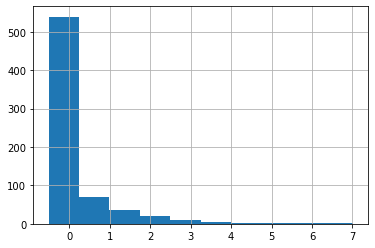

In [25]:
Yr.hist()
plt.show()

Extraction of training and test samples for both types of models. As the generator is initialized in the same way, the same samples are used in both cases.

In [26]:
from sklearn.model_selection import train_test_split  
X_train,X_test,RainR_train,RainB_test=train_test_split(dfC,Yb,test_size=130,random_state=11)
X_train,X_test,Yr_train,Yr_test=train_test_split(dfC,Yr,test_size=130,random_state=11)

In [27]:
from sklearn.preprocessing import StandardScaler  
# L'algorithme ds réseaux de neurones nécessite éventuellement une normalisation 
# des variables explicatives avec les commandes ci-dessous
scaler = StandardScaler()  
scaler.fit(X_train)  
Xr_train = scaler.transform(X_train)  
# Meme transformation sur le test
Xr_test = scaler.transform(X_test)

### Regression

A titre de comparaison, on trace la prévision du rain de l'échantillon train par la seule valeur du modèle *Precip* ainsi que les résidus à ce modèle fonction de la valeur prédite (Precip)

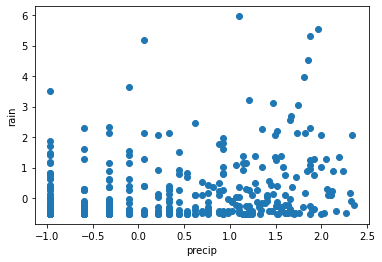

In [28]:
plt.plot(X_train["precip_log"],Yr_train,"o")
plt.xlabel("precip")
plt.ylabel("rain")
plt.show()

In [29]:
from sklearn.metrics import r2_score
print("R2=",r2_score(Yr_train,X_train["precip_log"]))

R2= -0.38530899495555615


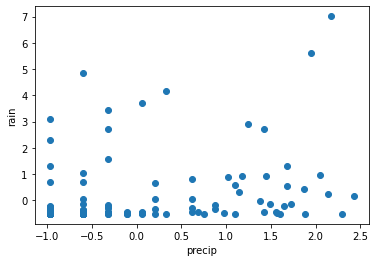

In [30]:
plt.plot(X_test["precip_log"],Yr_test,"o")
plt.xlabel("precip")
plt.ylabel("rain")
plt.show()

In [33]:
# Erreur quadratique moyenne
from sklearn.metrics import mean_squared_error
print("MSE=",mean_squared_error(X_test["precip_log"],Yr_test))

MSE= 1.9091025856248798


In [35]:
from sklearn.metrics import r2_score
print("R2=",r2_score(Yr_test,X_test["precip_log"]))

R2= -0.1416130856173201


Le coefficient de détermination est négatif en prévision avec un mauvais modèle

#### Régression linéaire ou modèle gaussien

On commence par la valeur de défaut du paramètre de pénalisation Lasso $\alpha = 1$

In [36]:
from sklearn import linear_model
regLasso = linear_model.Lasso()
regLasso.fit(Xr_train,Yr_train)
prev=regLasso.predict(Xr_test)
print("MSE=",mean_squared_error(Yr_test,prev))

MSE= 1.6879018521617635


In [37]:
from sklearn.metrics import r2_score
print("R2=",r2_score(Yr_test,prev))

R2= -0.009338553189830456


Maintenant on optimisera le paramètre de pénalisatiob Lasso par validation croisée avec le nombre de folds 5

In [39]:
from sklearn.model_selection import GridSearchCV
# grille de valeurs du paramètre alpha à optimiser
param=[{"alpha":[0.01,0.05,0.1,0.2,0.3,0.4,0.5,1]}]
regLasso = GridSearchCV(linear_model.Lasso(), param,cv=5,n_jobs=-1)
regLassOpt=regLasso.fit(Xr_train, Yr_train)
# paramètre optimal
regLassOpt.best_params_["alpha"]
print("Meilleur R2 = %f, Meilleur paramètre = %s" % (regLassOpt.best_score_,regLassOpt.best_params_))

Meilleur R2 = 0.205118, Meilleur paramètre = {'alpha': 0.05}


On obtient la meilleure valeur de $\alpha =0.05$. On fait la prévision avec la valeur optimale de `alpha` puis calcul et tracé des résidus.

In [40]:
prev=regLassOpt.predict(Xr_test)
print("MSE=",mean_squared_error(prev,Yr_test))
print("R2=",r2_score(Yr_test,prev))

MSE= 1.3553963600480947
R2= 0.18949446065386744


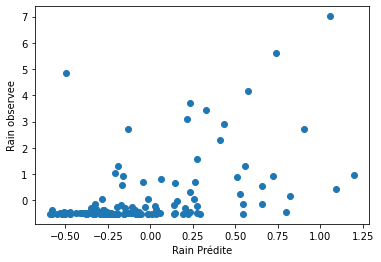

In [41]:
plt.plot(prev,Yr_test,"o")
plt.xlabel(u"Rain Prédite")
plt.ylabel("Rain observee")
plt.show()

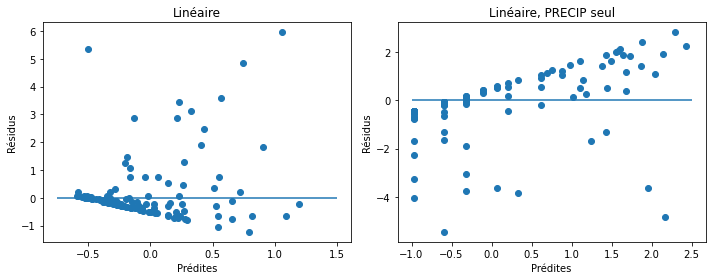

In [69]:
hist_fig, axs = plt.subplots(1,2,figsize=(10,4))
#axs = axs.ravel()
axs[0].plot(prev,Yr_test-prev,"o")
axs[0].set_xlabel("Prédites")
axs[0].set_ylabel("Résidus")
axs[0].set_title("Linéaire")
axs[0].hlines(0,-0.75,1.5)

axs[1].plot(X_test["precip_log"],X_test["precip_log"]-Yr_test,"o")
axs[1].set_xlabel("Prédites")
axs[1].set_ylabel("Résidus")
axs[1].set_title("Linéaire, PRECIP seul")
axs[1].hlines(0,-1,2.5)
plt.tight_layout()

`Q`: A comparer l'amélioration et les distibutions des nuages donc la validité du modèle

In [70]:
# Coefficients
regLasso=linear_model.Lasso(alpha=regLassOpt.best_params_['alpha'])
model_lasso=regLasso.fit(Xr_train,Yr_train)
model_lasso.coef_

array([ 0.0124105 ,  0.        , -0.01718484, -0.        , -0.        ,
       -0.        , -0.        , -0.        , -0.        ,  0.        ,
        0.        ,  0.        , -0.        , -0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.1112111 ,  0.10198589,
       -0.        , -0.08879208, -0.        , -0.16761028,  0.10640206,
        0.        ])

In [71]:
coef = pd.Series(model_lasso.coef_, index = X_train.columns)
print("Lasso conserve " + str(sum(coef != 0)) + 
      " variables et en supprime " +  str(sum(coef == 0)))

Lasso conserve 7 variables et en supprime 19


Text(0.5, 1.0, 'Coefficients du modèle lasso')

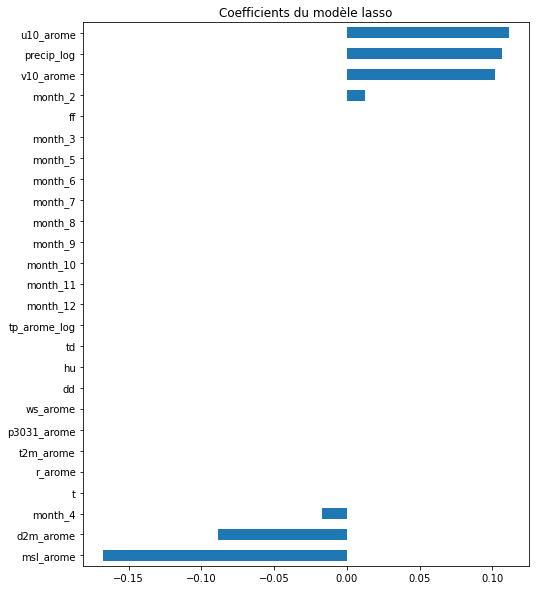

In [72]:
imp_coef = coef.sort_values()
plt.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title(u"Coefficients du modèle lasso")